<a href="https://colab.research.google.com/github/Brynlai/DataScienceHeartDiseaseAssignment/blob/Bryan/SimplifiedColumns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
# @title
!pip install ucimlrepo
!pip install pandas matplotlib seaborn scikit-learn

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Fetch the Heart Disease dataset from the UCI ML Repository
heart_disease_bunch = fetch_ucirepo(id=45)

# Print the fetched dataset
print(heart_disease_bunch)

{'data': {'ids': None, 'features':      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   1       145   233    1        2      150      0      2.3   
1     67    1   4       160   286    0        2      108      1      1.5   
2     67    1   4       120   229    0        2      129      1      2.6   
3     37    1   3       130   250    0        0      187      0      3.5   
4     41    0   2       130   204    0        2      172      0      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      174      0      0.0   
302   38    1   3       138   175    0        0      173      0      0.0   

     slope   ca  thal  
0        3  0.0   6.0  
1   

In [157]:
# Load into DataFrame
heart_disease = pd.DataFrame(data=heart_disease_bunch.data.features,
                             columns=heart_disease_bunch.data.feature_names,
                             index=heart_disease_bunch.data.ids)

heart_disease = pd.concat([heart_disease, heart_disease_bunch.data.targets], axis=1)
df = heart_disease
print(df.info())
df = df.rename(columns={'num': 'target'})
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

# Define bins for age
age_bins = [0, 30, 40, 50, 60, 70, np.inf]
age_labels = [1, 2, 3, 4, 5, 6]  # Assign numerical labels
df['age_binned'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Define bins for resting blood pressure
trestbps_bins = [0, 120, np.inf]
trestbps_labels = [1, 2]  # Assign numerical labels
df['trestbps_binned'] = pd.cut(df['trestbps'], bins=trestbps_bins, labels=trestbps_labels, include_lowest=True)

# Define bins for serum cholesterol
chol_bins = [0, 200, 240, np.inf]
chol_labels = [1, 2, 3]  # Assign numerical labels
df['chol_binned'] = pd.cut(df['chol'], bins=chol_bins, labels=chol_labels, include_lowest=True)

# Define bins for maximum heart rate achieved
thalach_bins = [0, 100, 140, np.inf]
thalach_labels = [1, 2, 3]  # Assign numerical labels
df['thalach_binned'] = pd.cut(df['thalach'], bins=thalach_bins, labels=thalach_labels, include_lowest=True)

# Define bins for ST depression induced by exercise
oldpeak_bins = [0, 1.0, 2.0, np.inf]
oldpeak_labels = [1, 2, 3]  # Assign numerical labels
df['oldpeak_binned'] = pd.cut(df['oldpeak'], bins=oldpeak_bins, labels=oldpeak_labels, include_lowest=True)

# Drop original numerical columns if desired
df = df.drop(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], axis=1)

# Print the updated DataFrame
print(df.head())
print(df.shape)
print(df.groupby('target').size())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB
None
   sex  cp  fbs  restecg  exang  slope   ca  thal  target age_binned  \
0    1   1    1        2      0      3  0.0   6.0       0          5   
1    1   4    0        2      1      2  3.0   3.0       1          5  

In [158]:
column_names = {
    "age_binned": "Age",
    "sex": "Gender",
    "cp": "ChestPainType",
    "trestbps_binned": "RestingBP",
    "fbs": "FastingBloodSugar",
    "restecg": "RestingECG",
    "exang": "ExerciseAngina",
    "slope": "ExerciseSlope",
    "ca": "MajorVessels",
    "thal": "ThalliumStress",
    "target": "HeartDisease",
    "chol_binned": "SerumCholesterol",
    "thalach_binned": "MaxHeartRate",
    "oldpeak_binned": "OldPeak"
}
df.rename(columns=column_names, inplace=True)
print("------- Renamed df:", df)

# Export the entire DataFrame to a CSV file (including all rows and columns)
# heart_disease.to_csv('heart_disease_full.csv', index=False)

------- Renamed df:      Gender  ChestPainType  FastingBloodSugar  RestingECG  ExerciseAngina  \
0         1              1                  1           2               0   
1         1              4                  0           2               1   
2         1              4                  0           2               1   
3         1              3                  0           0               0   
4         0              2                  0           2               0   
..      ...            ...                ...         ...             ...   
298       1              1                  0           0               0   
299       1              4                  1           0               0   
300       1              4                  0           0               1   
301       0              2                  0           2               0   
302       1              3                  0           0               0   

     ExerciseSlope  MajorVessels  ThalliumStress  Heart

In [159]:
# DATA CLEANING : Dealing with duplicate observation
# Check for any duplicate observation
duplicate_rows = df.duplicated()
print("Number of duplicate rows before:", duplicate_rows.sum())

# Remove duplicate rows
df = df.drop_duplicates()

# Check for duplicate rows again
duplicate_rows = df.duplicated()
print("Number of duplicate rows after:", duplicate_rows.sum())

Number of duplicate rows before: 5
Number of duplicate rows after: 0


In [160]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Replace missing values with the median of each column, only if the column is numerical
for column in df.columns:
    if df[column].dtype in [np.int64, np.float64]:  # Check if the column is numerical
        df[column] = df[column].fillna(df[column].median())

# Check if there are any missing values left
missing_values_after = df.isnull().sum()
print("Missing values after replacing with medians:")
print(missing_values_after)

Missing values in each column:
Gender               0
ChestPainType        0
FastingBloodSugar    0
RestingECG           0
ExerciseAngina       0
ExerciseSlope        0
MajorVessels         4
ThalliumStress       2
HeartDisease         0
Age                  0
RestingBP            0
SerumCholesterol     0
MaxHeartRate         0
OldPeak              0
dtype: int64
Missing values after replacing with medians:
Gender               0
ChestPainType        0
FastingBloodSugar    0
RestingECG           0
ExerciseAngina       0
ExerciseSlope        0
MajorVessels         0
ThalliumStress       0
HeartDisease         0
Age                  0
RestingBP            0
SerumCholesterol     0
MaxHeartRate         0
OldPeak              0
dtype: int64


Number of outliers in each column:
Gender                0
ChestPainType        23
FastingBloodSugar    45
RestingECG            0
ExerciseAngina        0
ExerciseSlope         0
MajorVessels         20
ThalliumStress        0
HeartDisease          0
dtype: int64


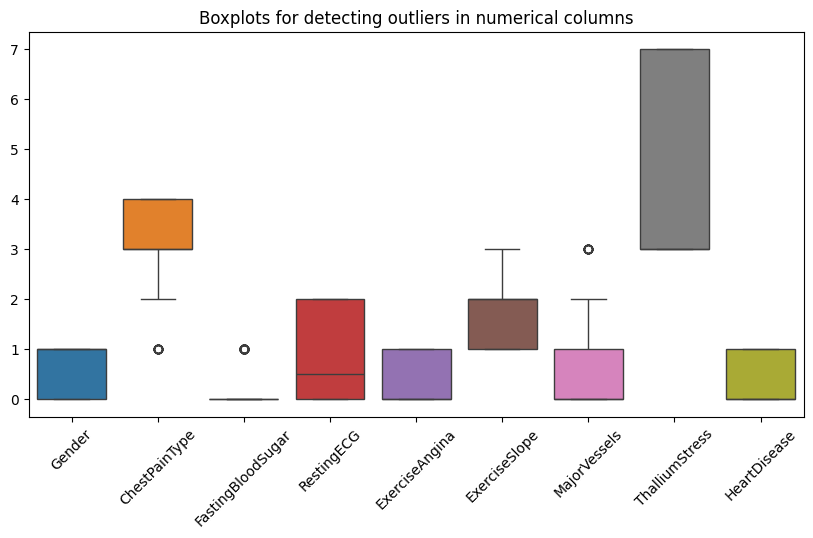

Replaced outliers in column 'ChestPainType' with median value 3.0
Replaced outliers in column 'FastingBloodSugar' with median value 0.0
Replaced outliers in column 'MajorVessels' with median value 0.0
Remaining outliers in each column after imputation:
Gender               0
ChestPainType        0
FastingBloodSugar    0
RestingECG           0
ExerciseAngina       0
ExerciseSlope        0
MajorVessels         0
ThalliumStress       0
HeartDisease         0
dtype: int64


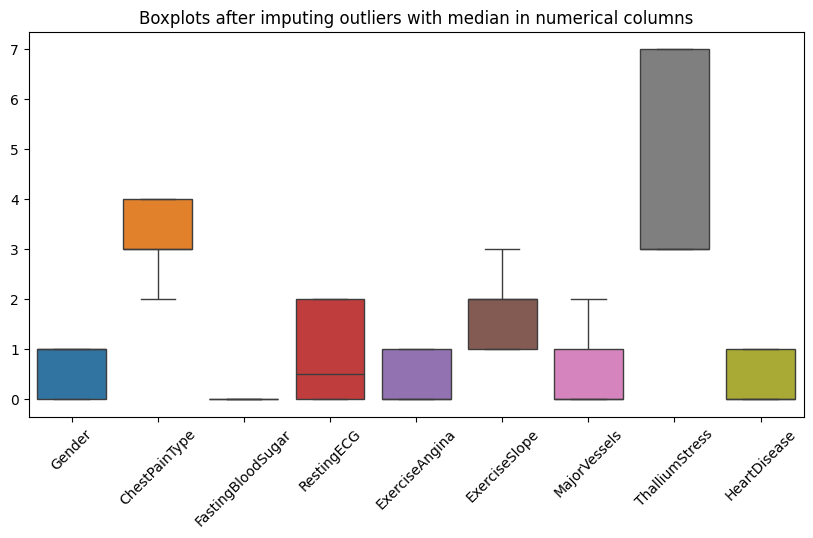

In [161]:


# Select only numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Calculate IQR for each numerical column
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outlier_mask = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Sum the number of outliers in each column
outliers = outlier_mask.sum()

print("Number of outliers in each column:")
print(outliers)

# Visualize outliers with boxplots, but only for numerical columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplots for detecting outliers in numerical columns')
plt.show()

# Handle outliers (e.g., impute with median)
for column in numeric_columns:
    is_outlier = outlier_mask[column]
    if is_outlier.any():
        median_value = df[column].median()
        df.loc[is_outlier, column] = median_value
        print(f"Replaced outliers in column '{column}' with median value {median_value}")

# Verify if there are any remaining outliers
remaining_outliers = ((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).sum()
print("Remaining outliers in each column after imputation:")
print(remaining_outliers)

# Visualize outliers with boxplots after imputation
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplots after imputing outliers with median in numerical columns')
plt.show()

In [162]:

# Calculate Q1, Q3, and IQR for numerical columns only
numerical_columns = df.select_dtypes(include=[np.int64, np.float64]).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers in numerical columns
outlier_mask = (df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))

# Debug: Print the first few rows of the outlier mask
print("Outlier Mask (first few rows):")
print(outlier_mask.head())

# Impute outliers with the median of each numerical column
for column in numerical_columns:
    is_outlier = outlier_mask[column]
    if is_outlier.any():
        median_value = df[column].median()
        df.loc[is_outlier, column] = median_value
        print(f"Replaced outliers in column '{column}' with median value {median_value}")

# Check the DataFrame after imputation
print("Data after imputing outliers:")
print(df.head())

# Verify if there are any remaining outliers in numerical columns
remaining_outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()
print("Remaining outliers in each numerical column after imputation:")
print(remaining_outliers)

Outlier Mask (first few rows):
   Gender  ChestPainType  FastingBloodSugar  RestingECG  ExerciseAngina  \
0   False          False              False       False           False   
1   False          False              False       False           False   
2   False          False              False       False           False   
3   False          False              False       False           False   
4   False          False              False       False           False   

   ExerciseSlope  MajorVessels  ThalliumStress  HeartDisease  
0          False         False           False         False  
1          False         False           False         False  
2          False         False           False         False  
3          False         False           False         False  
4          False         False           False         False  
Data after imputing outliers:
   Gender  ChestPainType  FastingBloodSugar  RestingECG  ExerciseAngina  \
0       1              3           

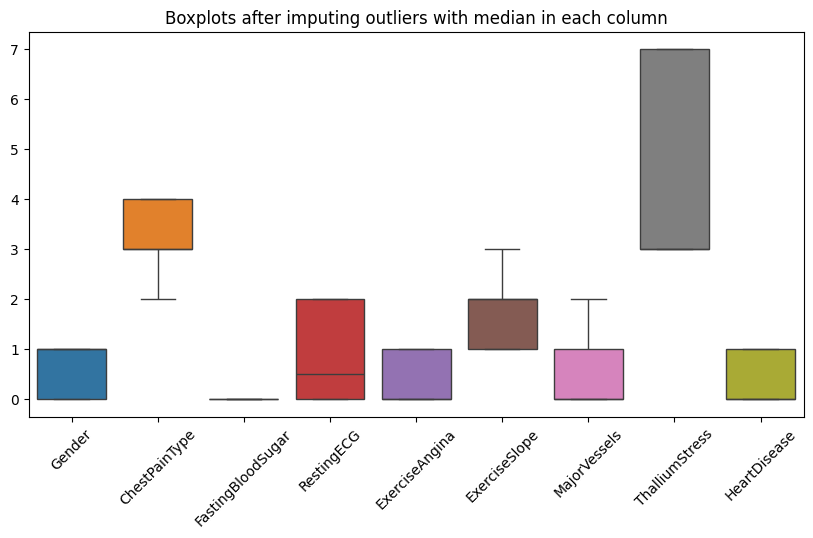

In [163]:
# DATA CLEANING : dealing with outliers
# Visualize outliers with boxplots after outliers have been imputed with median values
plt.figure(figsize=(10, 5))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title('Boxplots after imputing outliers with median in each column')
plt.show()

There exists an outlier in MaxHeartRate variable, but it also lies on where the left whisker ends, which is the minimum value. Thus we leave it as is and consider it as not an outlier, since removing it would distort the data.

(14.0, 0.0)

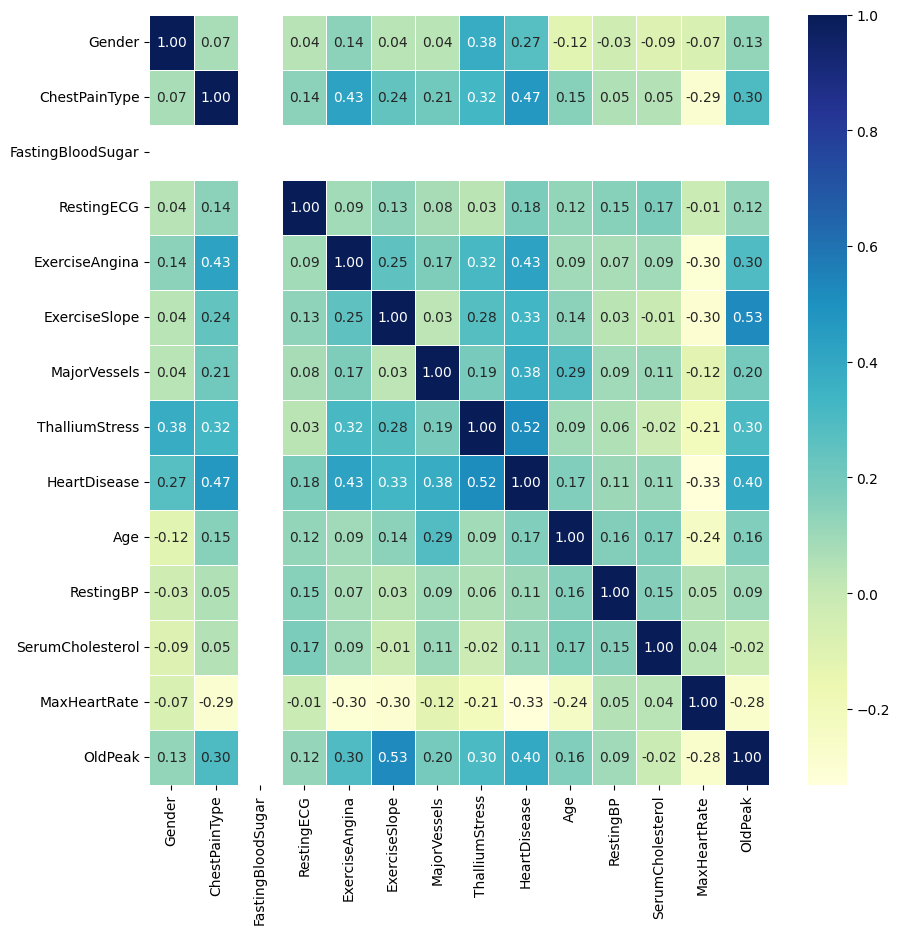

In [164]:
# Correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

In [166]:
# Prepare the data
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

np.random.seed(56)
test_sizes = {}
for i in range(13, 25):
    test_sizes[f"{i}%"] = i / 100

count = 0
best_models = {}
for sizeOfT, testSize in test_sizes.items():
    print(f"\n---Iteration {count} Test size: {sizeOfT}:")
    count += 1

    # Split the data using the fixed random state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=testSize, random_state=200)

    # Define the models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, solver='sag'),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(),
        "SVM": SVC()
    }

    modelPerformance = {}

    # Train and evaluate the models
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"{model_name} with Accuracy: {accuracy:.3f}")
        modelPerformance[model_name] = accuracy

    # Find and print the best model for this test size
    best_model_name = max(modelPerformance, key=modelPerformance.get)
    best_model_accuracy = modelPerformance[best_model_name]
    print(f"Best Model: {best_model_name} with Accuracy: {best_model_accuracy:.3f}")

    # Store the best model for each test size
    best_models[sizeOfT] = (best_model_name, best_model_accuracy)

# Print the best models for each test size
print("\nBest Models for Each Test Size:")
for test_size, (best_model, accuracy) in best_models.items():
    print(f"Test Size: {test_size}, Best Model: {best_model} with Accuracy: {accuracy:.3f}")


---Iteration 0 Test size: 13%:
Logistic Regression with Accuracy: 0.795
Decision Tree with Accuracy: 0.744
Random Forest with Accuracy: 0.846
Gradient Boosting with Accuracy: 0.821
SVM with Accuracy: 0.795
Best Model: Random Forest with Accuracy: 0.846

---Iteration 1 Test size: 14%:
Logistic Regression with Accuracy: 0.810
Decision Tree with Accuracy: 0.762
Random Forest with Accuracy: 0.857
Gradient Boosting with Accuracy: 0.857
SVM with Accuracy: 0.810
Best Model: Random Forest with Accuracy: 0.857

---Iteration 2 Test size: 15%:
Logistic Regression with Accuracy: 0.778
Decision Tree with Accuracy: 0.756
Random Forest with Accuracy: 0.844
Gradient Boosting with Accuracy: 0.867
SVM with Accuracy: 0.822
Best Model: Gradient Boosting with Accuracy: 0.867

---Iteration 3 Test size: 16%:
Logistic Regression with Accuracy: 0.750
Decision Tree with Accuracy: 0.771
Random Forest with Accuracy: 0.854
Gradient Boosting with Accuracy: 0.854
SVM with Accuracy: 0.812
Best Model: Random Forest w